## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [3]:
df = pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Descriptive Statistics

In [4]:
TASK = 'regression'
TARGET = 'median_house_value'

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Plotting Missing Data

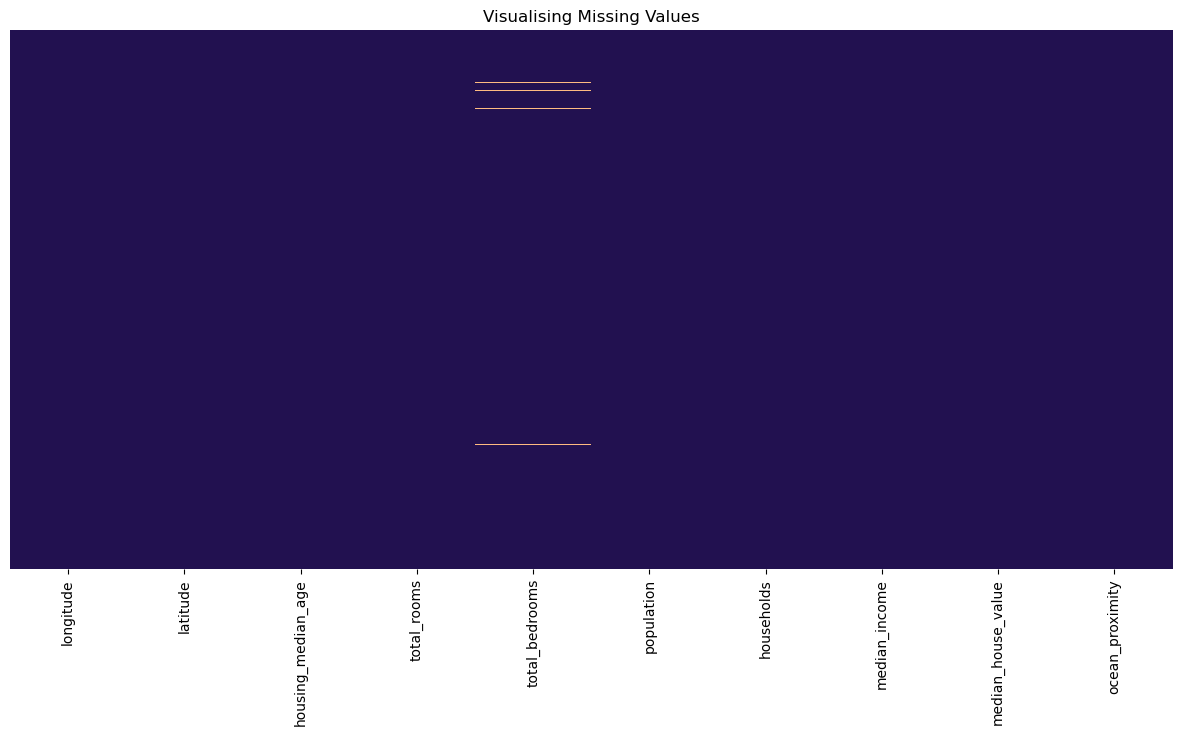

In [7]:
plt.figure(figsize=(15, 7))
plt.title("Visualising Missing Values")
sns.heatmap(df.isna(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False)
plt.show()

### Segregating data

In [9]:
num_cols, cat_cols = df.select_dtypes(exclude=['object']).columns.tolist(), df.select_dtypes(include=['object']).columns.tolist()

print(f'Numerical Columns: {num_cols} \nCategorical Columns: {cat_cols}')

Numerical Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'] 
Categorical Columns: ['ocean_proximity']


In [10]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values. The top 5 values are: \n\n{df[col].value_counts().head(5)}\n')    

longitude has 844 unique values. The top 5 values are: 

longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
Name: count, dtype: int64

latitude has 862 unique values. The top 5 values are: 

latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
Name: count, dtype: int64

housing_median_age has 52 unique values. The top 5 values are: 

housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
Name: count, dtype: int64

total_rooms has 5926 unique values. The top 5 values are: 

total_rooms
1527.0    18
1613.0    17
1582.0    17
2127.0    16
1717.0    15
Name: count, dtype: int64

total_bedrooms has 1923 unique values. The top 5 values are: 

total_bedrooms
280.0    55
331.0    51
345.0    50
343.0    49
393.0    49
Name: count, dtype: int64

population has 3888 unique values. The top 5 values are: 

population
891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
Name: count, dtype: int64

househo

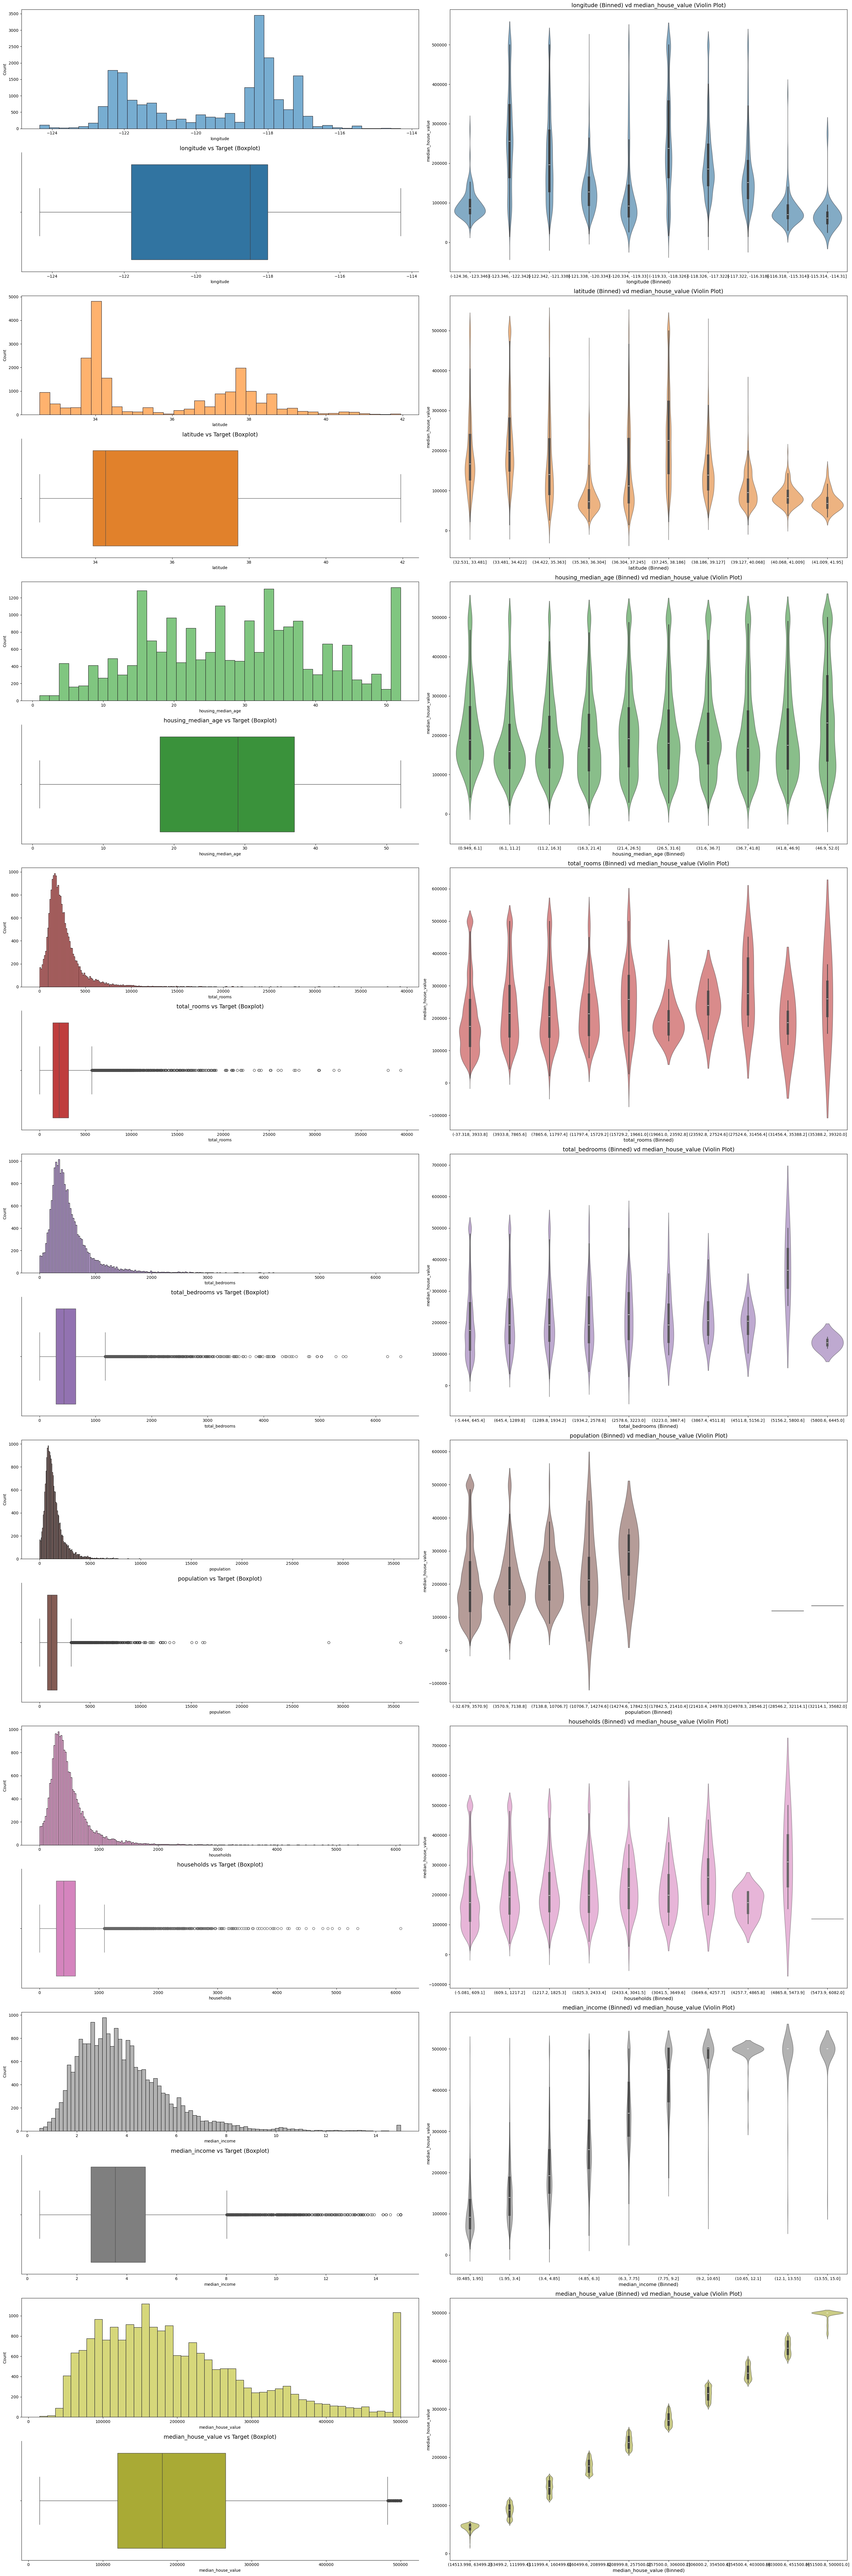

In [11]:
from matplotlib.gridspec import GridSpec


palette = sns.color_palette('tab10', len(num_cols))
color_dict = dict(zip(num_cols, palette))

fig = plt.figure(figsize=(30, 10 * len(num_cols)))
gs = GridSpec(2 * len(num_cols), 2, figure=fig)

df_binned = df.copy()

for i, col in enumerate(num_cols):
    discrete = df[col].nunique() < 51

    # Histogram Plot
    ax_hist = fig.add_subplot(gs[2 * i, 0])
    sns.histplot(
        data=df,
        x=col,
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=0.8,
        color=color_dict[col],
        ax=ax_hist,
        discrete=discrete
    )


    # Boxplot Plot
    ax_box = fig.add_subplot(gs[2 * i + 1, 0])
    sns.boxplot(
        data=df,
        x=col,
        ax=ax_box,
        color=color_dict[col]
    )
    ax_box.set_title(f'{col} vs Target (Boxplot)', fontsize=14)
    sns.despine(ax=ax_box)

    # Conditional Plot: Violin/Bar plot
    ax_cond = fig.add_subplot(gs[2 * i: 2 * i + 2, 1])

    if df[col].nunique() < 11:
        sns.violinplot(
            data=df,
            x=col,
            y=TARGET,
            ax=ax_cond,
            color=color_dict[col],
            alpha=0.6
        )
        ax_cond.set_title(f"{col} vs {TARGET} (Violin Plot)", fontsize=14)

    else:
        df_binned[col + '_Binned'] = pd.cut(df[col], bins=10)
        sns.violinplot(
            data=df_binned,
            x=col + '_Binned',
            y=TARGET,
            ax=ax_cond,
            color=color_dict[col],
            alpha=0.6
        )
        ax_cond.set_title(f"{col} (Binned) vd {TARGET} (Violin Plot)", fontsize=14)
        ax_cond.set_xlabel(f"{col} (Binned)", fontsize=12)
    

plt.tight_layout()
plt.show()


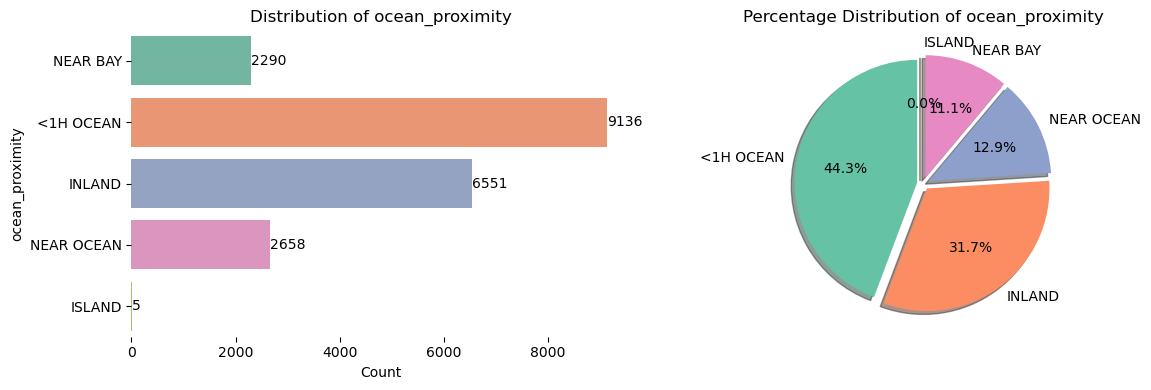

In [12]:
for col in cat_cols:
    plt.figure(figsize=(12, 4))
    
    # Bar plot for categorical distribution
    plt.subplot(1, 2, 1)
    sns.countplot(y=col, data=df, palette='Set2', hue=col, legend=False)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('Count', fontsize=10)
    plt.ylabel(col, fontsize=10)

    ax = plt.gca()
    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f'{count}', 
                    (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black')
    
    sns.despine(left=True, bottom=True)
    
    # Pie chart for percentage distribution
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        colors=sns.color_palette('Set2', df[col].nunique()), 
        startangle=90, 
        explode=[0.05] * df[col].nunique(), 
        shadow=True
    )
    plt.title(f'Percentage Distribution of {col}', fontsize=12)
    plt.ylabel('')  

    plt.tight_layout()
    plt.show()

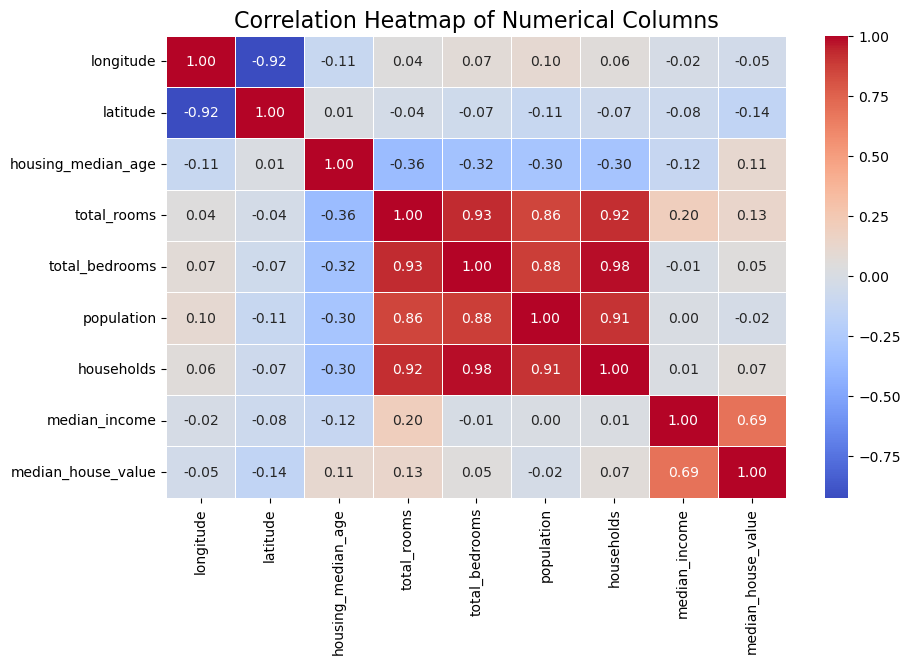

In [13]:
corr_mat = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.show()

## Feature Engineering

### Target Encoding

In [12]:
# for col in num_cols:
#     display(df.groupby([col])[TARGET].sum())

## Data Processing

In [15]:
X, y = df.drop(columns=[TARGET]), df[TARGET]

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


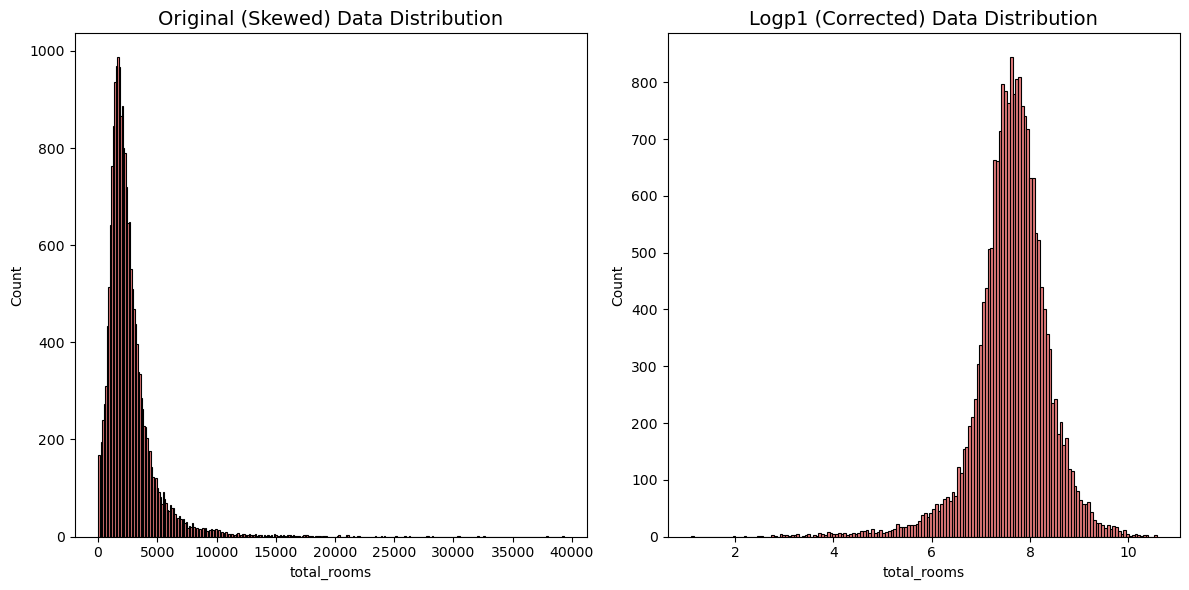

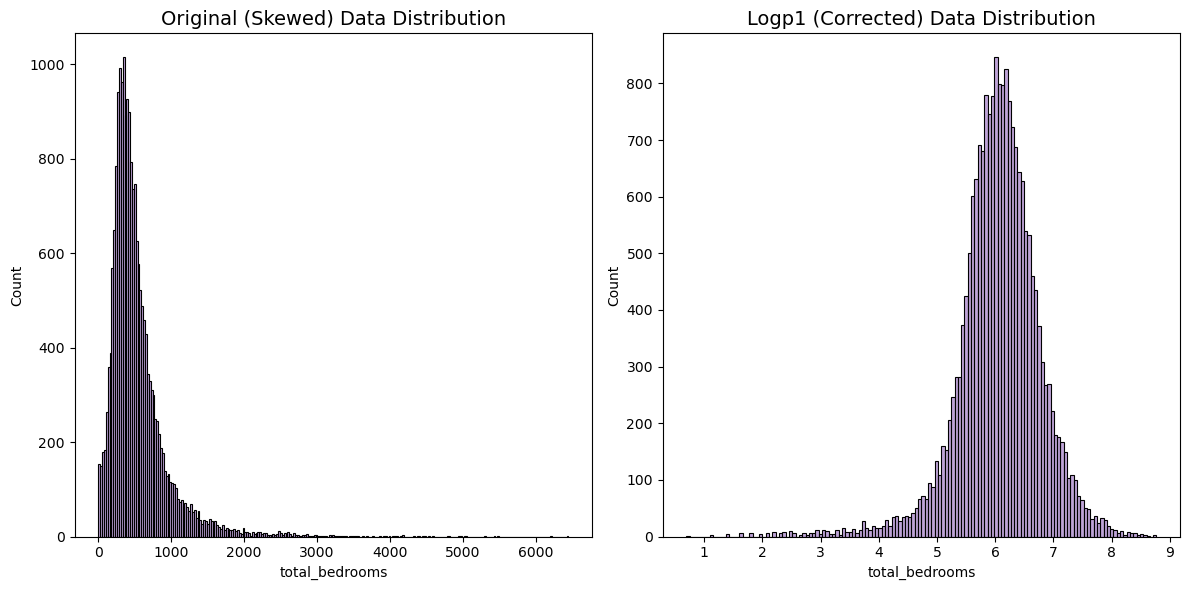

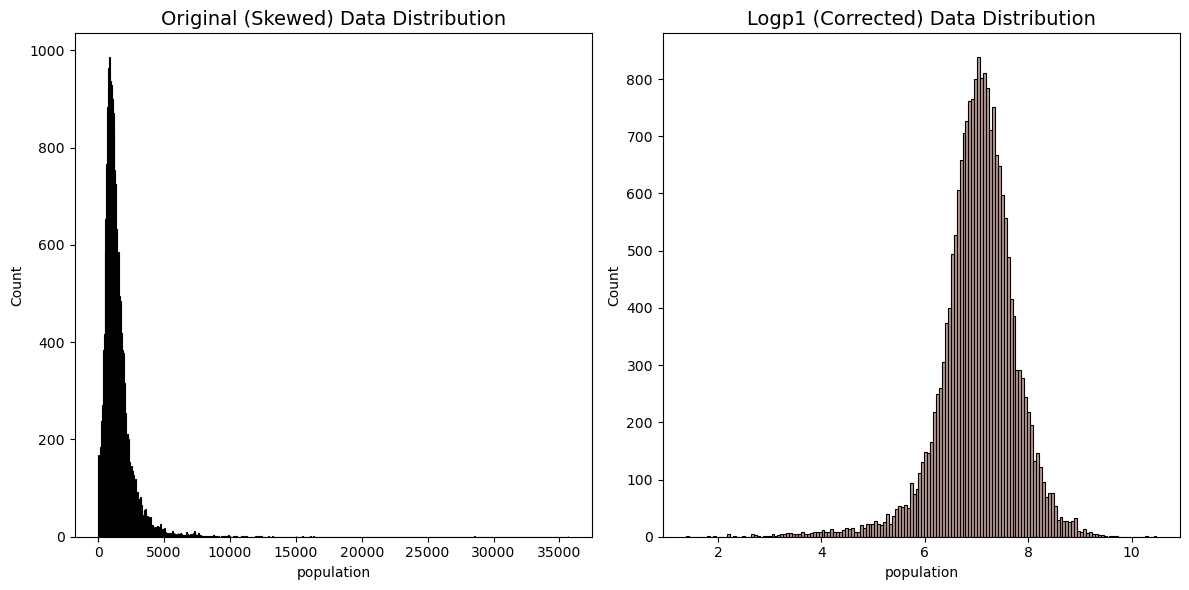

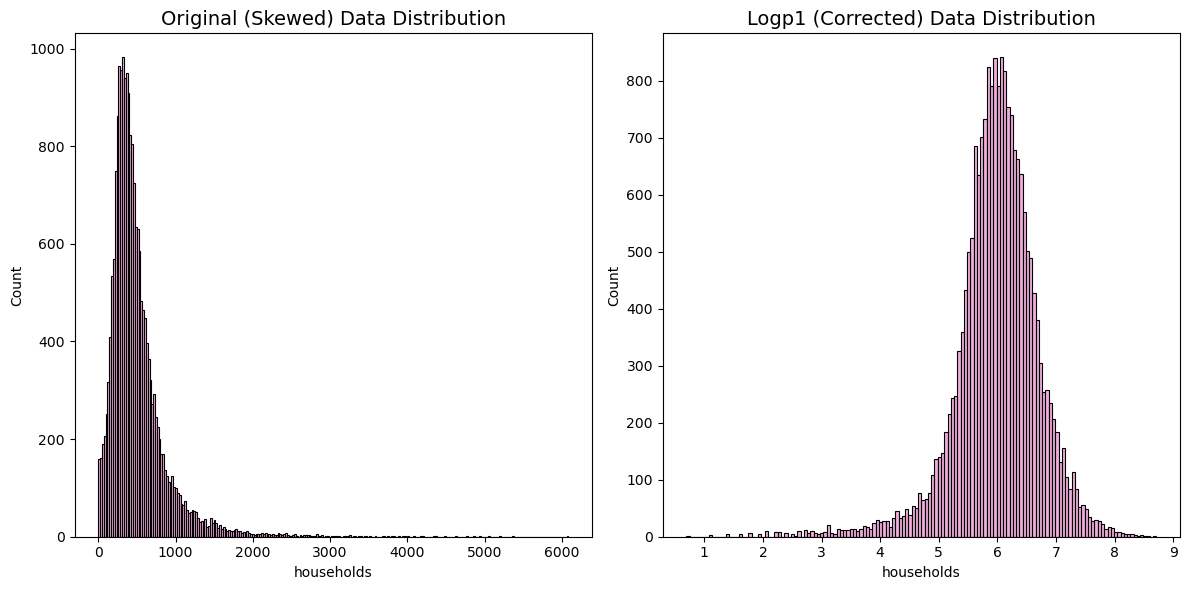

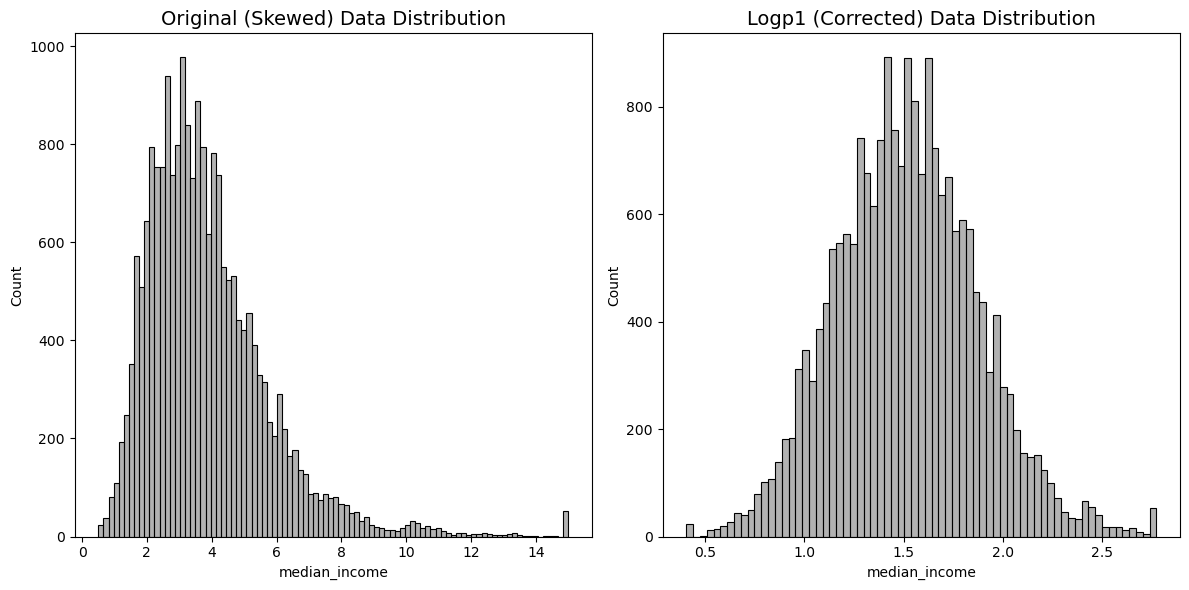

In [16]:
# Correcting the skewed data
sk = df[num_cols].skew()
sk_cols = sk[sk > 1].index

df_ln = np.log1p(df[sk_cols])

for col in sk_cols:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(
        data=df,
        x=col,
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=0.8,
        color=color_dict[col]
    )
    plt.title("Original (Skewed) Data Distribution", fontsize=14)

    plt.subplot(1, 2, 2)
    sns.histplot(
        data=df_ln,
        x=col,
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=0.8,
        color=color_dict[col]
    )
    plt.title("Logp1 (Corrected) Data Distribution", fontsize=14)


    plt.tight_layout()
    plt.show()

In [17]:
X = df.copy()

X[sk_cols] = df_ln
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY


### Correlation Comparison

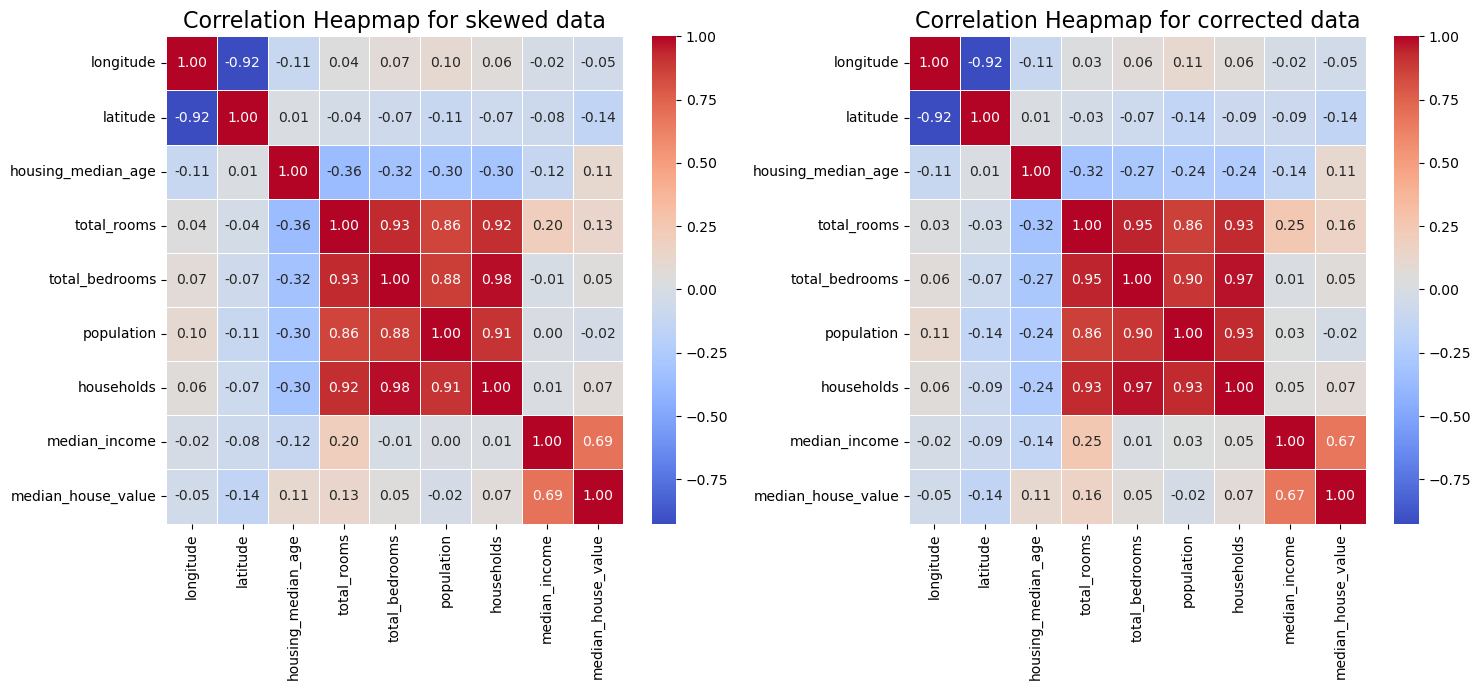

In [18]:
plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    linewidth=0.5
)
plt.title("Correlation Heapmap for skewed data", fontsize=16)


plt.subplot(1, 2, 2)
sns.heatmap(
    X[num_cols].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    linewidth=0.5
)
plt.title("Correlation Heapmap for corrected data", fontsize=16)


plt.tight_layout()
plt.show()

### Plot all treated data

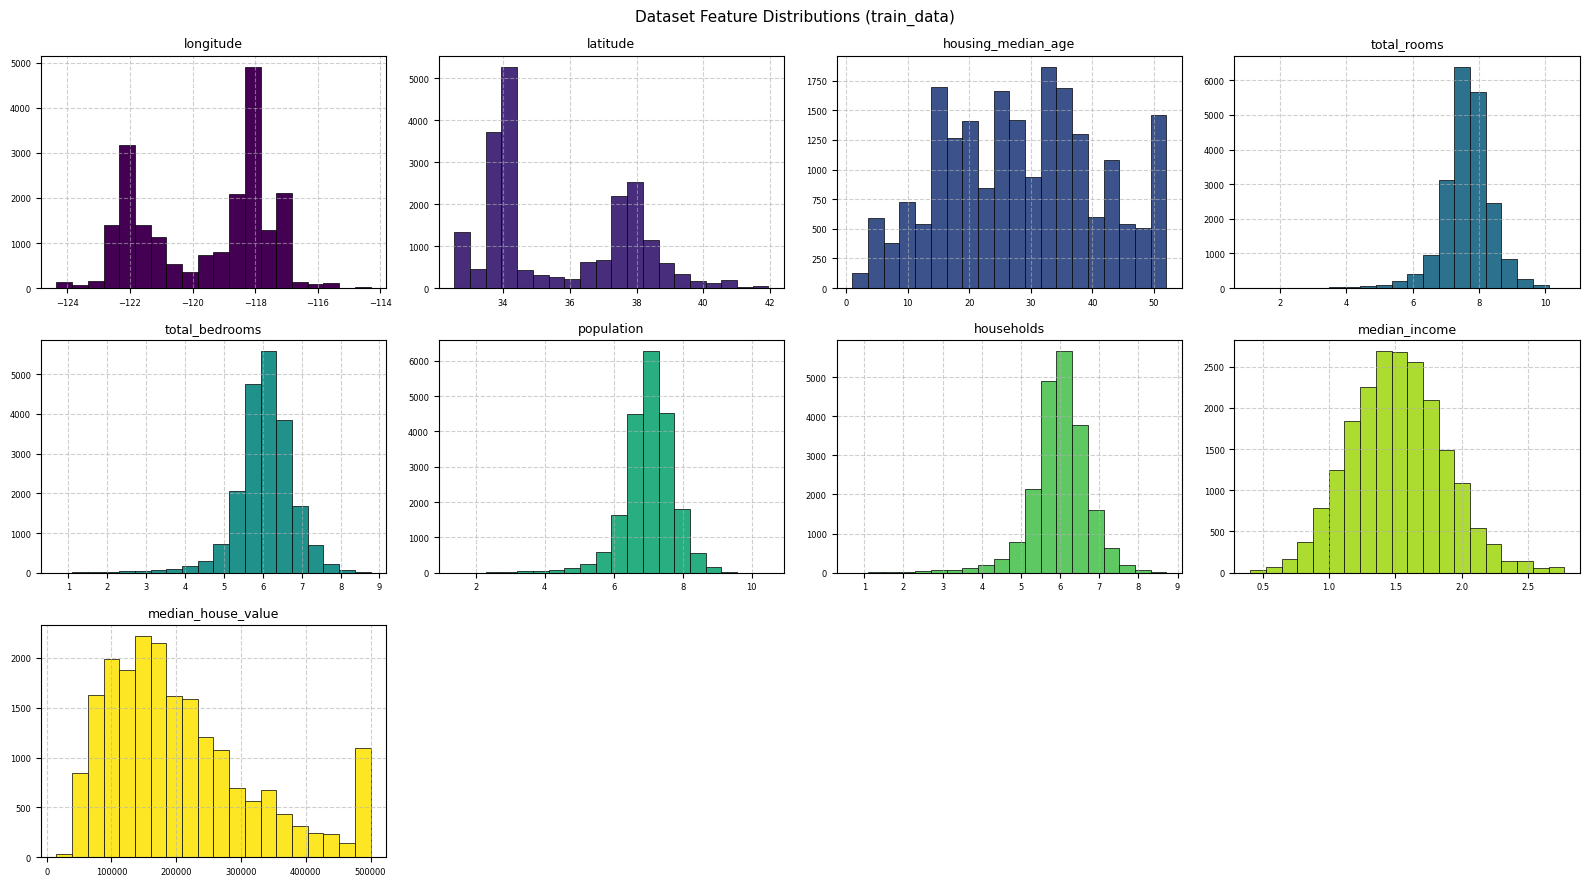

In [19]:
import math

# Identify numeric columns only (excluding boolean columns)
# numeric_columns = train.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed
num_features = len(num_cols)
NC = 4
num_rows = math.ceil(num_features / NC)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=NC, figsize=(16, num_rows * 3))
viridis_cmap = plt.get_cmap('viridis', len(num_cols))

# Plot each numeric column
for i, column in enumerate(num_cols):
    ax = axes.flatten()[i]
    X[column].hist(
        ax=ax, 
        bins=20, 
        color=viridis_cmap(i / len(num_cols)),  
        edgecolor='black', 
        linewidth=0.5
    )
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)  

# Remove empty subplots if any
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Dataset Feature Distributions (train_data)', fontsize=11)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


ss = StandardScaler()
train = pd.DataFrame(ss.fit_transform(X[num_cols]), columns=num_cols)


ohe = OneHotEncoder(sparse_output=False)
train = pd.concat([train, pd.DataFrame(ohe.fit_transform(X[cat_cols]), columns=['ocean_prox_' + str(i) for i in range(5)])], axis=1)

final_cols = train.columns
imp = SimpleImputer(strategy='median')
train = pd.DataFrame(imp.fit_transform(train), columns=final_cols)

train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_prox_0,ocean_prox_1,ocean_prox_2,ocean_prox_3,ocean_prox_4
0,-1.327835,1.052548,0.982143,-1.131133,-1.633628,-1.694943,-1.569395,1.995505,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,1.651357,1.313730,1.030337,1.449251,1.988380,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.450310,-1.104202,-1.109604,-1.104849,1.656444,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.638257,-0.813084,-0.949925,-0.813343,1.049948,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.312370,-0.572930,-0.933021,-0.583469,0.170631,1.172900,0.0,0.0,0.0,1.0,0.0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, train_size=0.8, random_state=42)

## Model Training

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

## Model Evaluation

In [23]:
from sklearn.metrics import root_mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(train)

rmsle = root_mean_squared_log_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Display performance metrics
print(f"\nPerformance Metrics:\n{'-'*30}")
print(f"RMSLE: {rmsle:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


Performance Metrics:
------------------------------
RMSLE: 0.0000
RMSE: 0.0000
MAE: 0.0000
R²: 1.0000
MAPE: 0.00%
